# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Arisyi Said Tanjung
- **Email:** arisyisaid14@gmail.com
- **ID Dicoding:** arisyisaid

## Menentukan Pertanyaan Bisnis

- Bagaimana pola permintaan sepeda per jam pada hari kerja dibandingkan akhir pekan, dan jam berapa saja puncak penyewaan terjadi?
- Seberapa besar pengaruh kondisi cuaca terhadap jumlah penyewaan di setiap musim?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Untuk visualisasi interaktif (opsional di notebook)
import plotly.express as px
import plotly.graph_objects as go

## Data Wrangling

### Gathering Data

In [2]:
# Baca kedua dataset
day_df = pd.read_csv('/content/day.csv')
hour_df = pd.read_csv('/content/hour.csv')

print('day.csv shape:', day_df.shape)
print('hour.csv shape:', hour_df.shape)

day.csv shape: (731, 16)
hour.csv shape: (17379, 17)


**Insight:**
- Dataset `day.csv` memiliki 731 baris (data harian) dan 16 kolom.  
- Dataset `hour.csv` memiliki 17.379 baris (data per jam) dan 17 kolom.  
- Kedua dataset akan digunakan untuk menjawab pertanyaan yang berbeda: data jam untuk pola harian, data harian untuk pengaruh musim.

### Assessing Data

In [3]:
# Cek informasi umum
day_df.info()
hour_df.info()

# Cek missing values
print(day_df.isnull().sum())
print(hour_df.isnull().sum())

# Statistik deskriptif
day_df.describe()
hour_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**  
- Tidak ada missing values di kedua dataset.  
- Kolom `dteday` masih bertipe object, perlu diubah ke datetime.  
- Kolom kategori seperti `season`, `weathersit`, dll. sebaiknya diubah ke tipe category agar lebih efisien.  
- Statistik deskriptif menunjukkan rentang nilai yang wajar (misal suhu ternormalisasi 0–1).

### Cleaning Data

In [4]:
# Ubah tipe data
for df in [day_df, hour_df]:
    df['dteday'] = pd.to_datetime(df['dteday'])
    df['season'] = df['season'].astype('category')
    df['yr'] = df['yr'].astype('category')
    df['mnth'] = df['mnth'].astype('category')
    df['holiday'] = df['holiday'].astype('category')
    df['weekday'] = df['weekday'].astype('category')
    df['workingday'] = df['workingday'].astype('category')
    df['weathersit'] = df['weathersit'].astype('category')

# Untuk hour_df, ubah juga kolom hr
hour_df['hr'] = hour_df['hr'].astype('int')

**Insight:**  
- Semua kolom telah diubah ke tipe data yang sesuai.  
- Data siap untuk dianalisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore ...

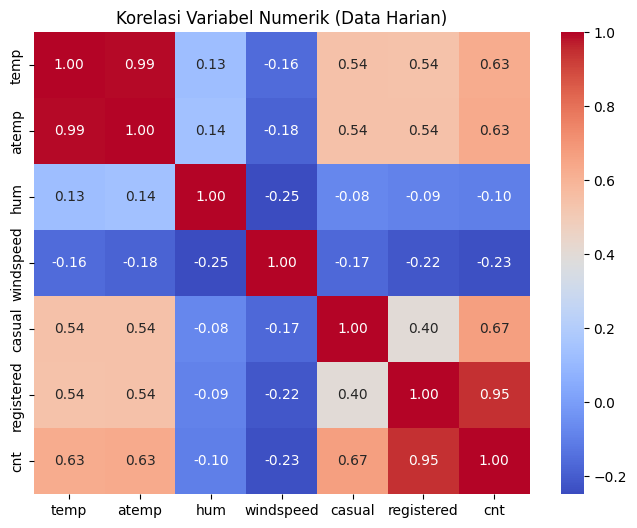

In [5]:
# Korelasi antar variabel numerik (day)
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
corr = day_df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Variabel Numerik (Data Harian)')
plt.show()

**Insight:**  
- `temp` dan `atemp` berkorelasi sangat tinggi (0.99), jadi cukup gunakan salah satu.  
- `cnt` berkorelasi positif kuat dengan `registered` (0.95) dan `temp` (0.63), menunjukkan bahwa pengguna terdaftar dan suhu hangat meningkatkan penyewaan.  
- Kelembaban (`hum`) berkorelasi negatif lemah dengan `cnt`.

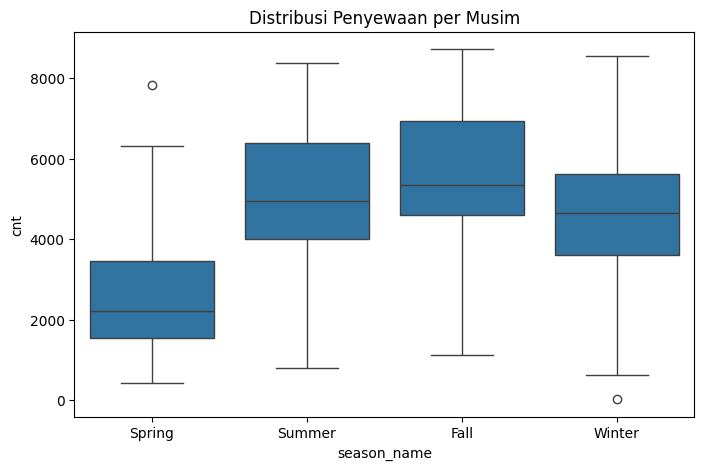

In [6]:
# Rata-rata penyewaan per musim
season_order = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
day_df['season_name'] = day_df['season'].map(season_order)

plt.figure(figsize=(8,5))
sns.boxplot(x='season_name', y='cnt', data=day_df, order=['Spring','Summer','Fall','Winter'])
plt.title('Distribusi Penyewaan per Musim')
plt.show()

**Insight:**  
- Musim panas (3) dan gugur (4) memiliki penyewaan tertinggi, musim semi (1) terendah.  
- Variasi penyewaan cukup besar di setiap musim, terutama di musim panas.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

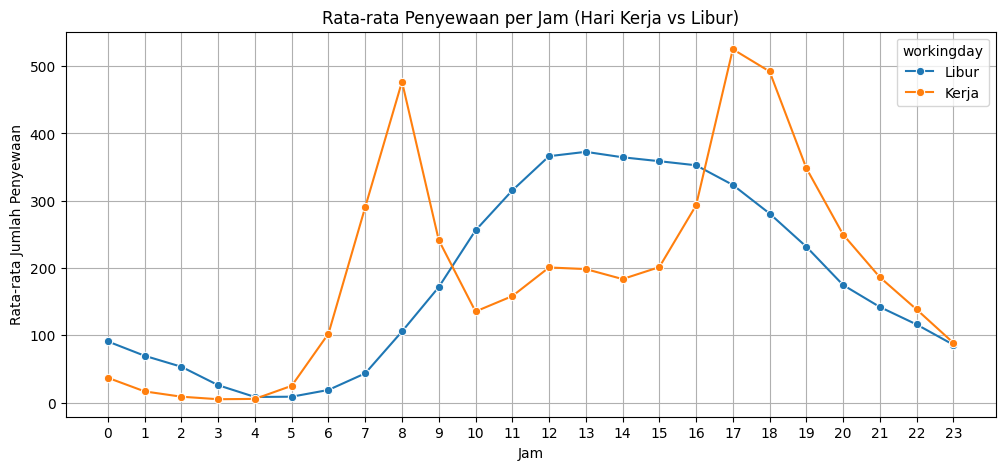

In [7]:
# Rata-rata penyewaan per jam (hari kerja vs libur)
hourly_avg = hour_df.groupby(['hr', 'workingday'])['cnt'].mean().reset_index()
hourly_avg['workingday'] = hourly_avg['workingday'].map({0:'Libur', 1:'Kerja'})

plt.figure(figsize=(12,5))
sns.lineplot(data=hourly_avg, x='hr', y='cnt', hue='workingday', marker='o')
plt.title('Rata-rata Penyewaan per Jam (Hari Kerja vs Libur)')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

**Insight:**  
- Hari kerja (workingday=1) memiliki dua puncak: pagi (jam 7-9) dan sore (jam 17-19) – ini pola komuter.  
- Hari libur (workingday=0) hanya memiliki satu puncak di siang hari (jam 12-15) dan lebih landai.  
- Jam paling sepi adalah dini hari (jam 0-5) untuk kedua tipe hari.

### Pertanyaan 2:

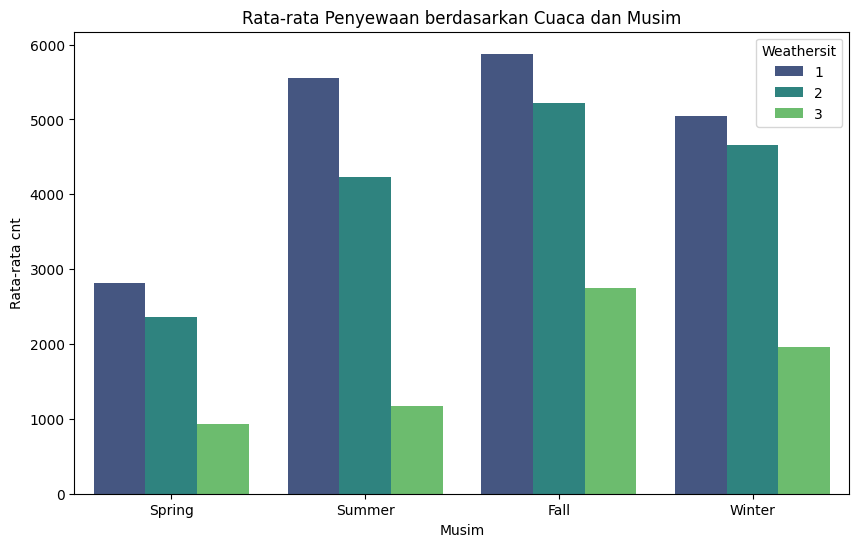

In [8]:
# Rata-rata cnt per kondisi cuaca di setiap musim
weather_musim = day_df.groupby(['season_name', 'weathersit'])['cnt'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=weather_musim, x='season_name', y='cnt', hue='weathersit', palette='viridis')
plt.title('Rata-rata Penyewaan berdasarkan Cuaca dan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata cnt')
plt.legend(title='Weathersit')
plt.show()

**Insight:**  
- Cuaca cerah (weathersit=1) selalu menghasilkan penyewaan tertinggi di semua musim.  
- Cuaca buruk (weathersit=3,4) sangat menurunkan penyewaan, bahkan di musim panas.  
- Musim gugur (Fall) memiliki penyewaan tertinggi saat cuaca cerah, mungkin karena suhu sejuk.

## Analisis Lanjutan (Opsional)

In [9]:
# Fungsi sederhana untuk mengelompokkan jam
def kategori_jam(jam):
    if 6 <= jam <= 9:
        return 'Pagi Komuter'
    elif 10 <= jam <= 15:
        return 'Siang'
    elif 16 <= jam <= 19:
        return 'Sore Komuter'
    else:
        return 'Malam'

hour_df['kategori_jam'] = hour_df['hr'].apply(kategori_jam)

# Lihat rata-rata penyewaan per kategori
hour_df.groupby('kategori_jam')['cnt'].mean().sort_values(ascending=False)

,cnt
kategori_jam,
Sore Komuter,377.629973
Siang,230.192493
Pagi Komuter,216.704061
Malam,77.359071


## Conclusion

**Kesimpulan:**  
1. Pola permintaan sepeda per jam sangat berbeda antara hari kerja dan libur. Pada hari kerja, terjadi dua lonjakan: pagi (jam 7-9) dan sore (jam 17-19) yang mengindikasikan pengguna komuter. Pada hari libur, puncak terjadi siang hari (jam 12-15) dengan pola lebih merata. Jam tersibuk secara keseluruhan adalah sore hari kerja (jam 17-18).  
2. Kondisi cuaca sangat memengaruhi penyewaan di setiap musim. Cuaca cerah selalu menghasilkan penyewaan tertinggi, sedangkan cuaca buruk (hujan, kabut) menurunkan penyewaan drastis. Bahkan di musim panas, cuaca buruk bisa memotong penyewaan hingga setengahnya. Oleh karena itu, prakiraan cuaca dapat digunakan untuk mengatur ketersediaan sepeda.

In [10]:
# Di notebook, setelah selesai analisis, simpan data untuk dashboard
hourly_pattern = hour_df.groupby(['hr', 'workingday'])['cnt'].mean().reset_index()
season_weather = day_df.groupby(['season', 'weathersit'])['cnt'].mean().reset_index()

# Simpan ke CSV
hourly_pattern.to_csv('/content/hourly_pattern.csv', index=False)
season_weather.to_csv('/content/season_weather.csv', index=False)